## EDA

importing library here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import csv data as pandas dataframe

In [2]:
college = pd.read_csv('data/raw.csv') 
#better to give location for your data like data/raw.csv

In [3]:
college.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
college.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
college.shape

(1000, 8)

In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
college.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
#Defining Neumerical and Categorical Features

numerical_features = [data for data in college.columns if college[data].dtypes != 'O']
cat_features = [data for data in college.columns if college[data].dtypes == 'O']

In [9]:
# printing of features

print(f'we have {len(numerical_features)} numerical features and these are {(numerical_features)}')
print(f'we have {len(cat_features)} categorical features and these are {(cat_features)}')

we have 3 numerical features and these are ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features and these are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
# Adding column for total score and average score

college['total_score'] = college['math_score']+ college['reading_score']+college['writing_score']
college['average_score'] = college['total_score']/3
college.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
# finding students who has score full marks in their subject

#in place of average score you can also write gender it is used to give the stationary point
reading_full = college[college['reading_score'] == 100]['average_score'].count()
writing_full = college[college['writing_score'] == 100]['average_score'].count()
math_full = college[college['math_score'] == 100]['average_score'].count()

#printing this information

print(f'{reading_full} Students has scored full 100 marks in reading')
print(f'{writing_full} Students has scored full 100 marks in writing')
print(f'{math_full} Students has scored full 100 marks in math')


17 Students has scored full 100 marks in reading
14 Students has scored full 100 marks in writing
7 Students has scored full 100 marks in math


In [12]:
#finding students who has score 20 marks in their subject

reading_less_20 = college[college['reading_score'] <= 20]['average_score'].count()
writing_less_20 = college[college['writing_score'] <= 20]['average_score'].count()
math_less_20 = college[college['math_score'] <= 20]['average_score'].count()

#printing this information
print(f'{reading_less_20} Students has scored 20 marks in reading')
print(f'{writing_less_20} Students has scored 20 marks in writing')
print(f'{math_less_20} Students has scored 20 marks in math')

1 Students has scored 20 marks in reading
3 Students has scored 20 marks in writing
4 Students has scored 20 marks in math


## Data visulization

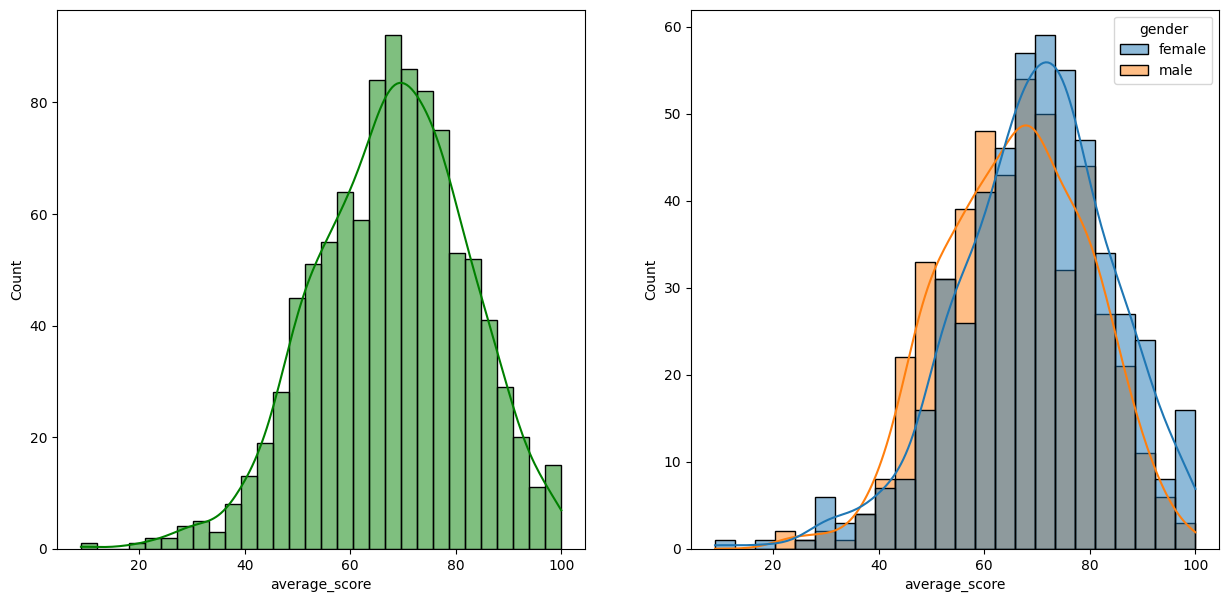

In [13]:
# 4.1 To make histogram average marks vs no of students

fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = college, x = 'average_score',bins = 30,  kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data = college, x = 'average_score', kde = True, hue = 'gender')
plt.show()

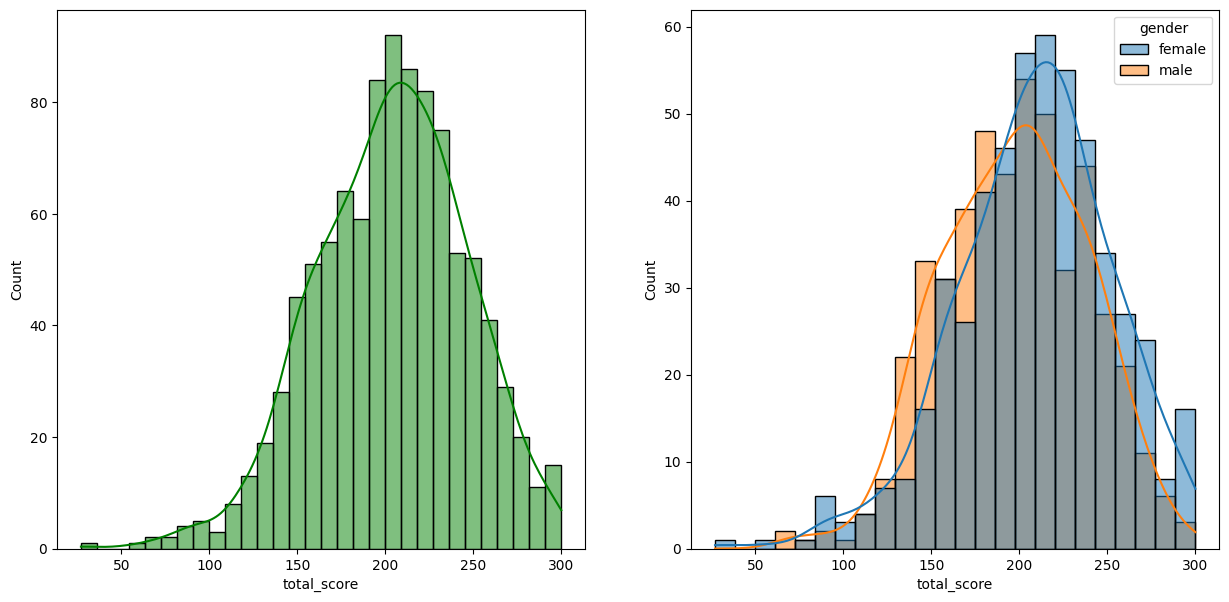

In [14]:
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = college, x = 'total_score',bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = college, x = 'total_score', kde = True, color = 'g', hue = 'gender')
plt.show()


Insights

* Female students are persormed better than male students

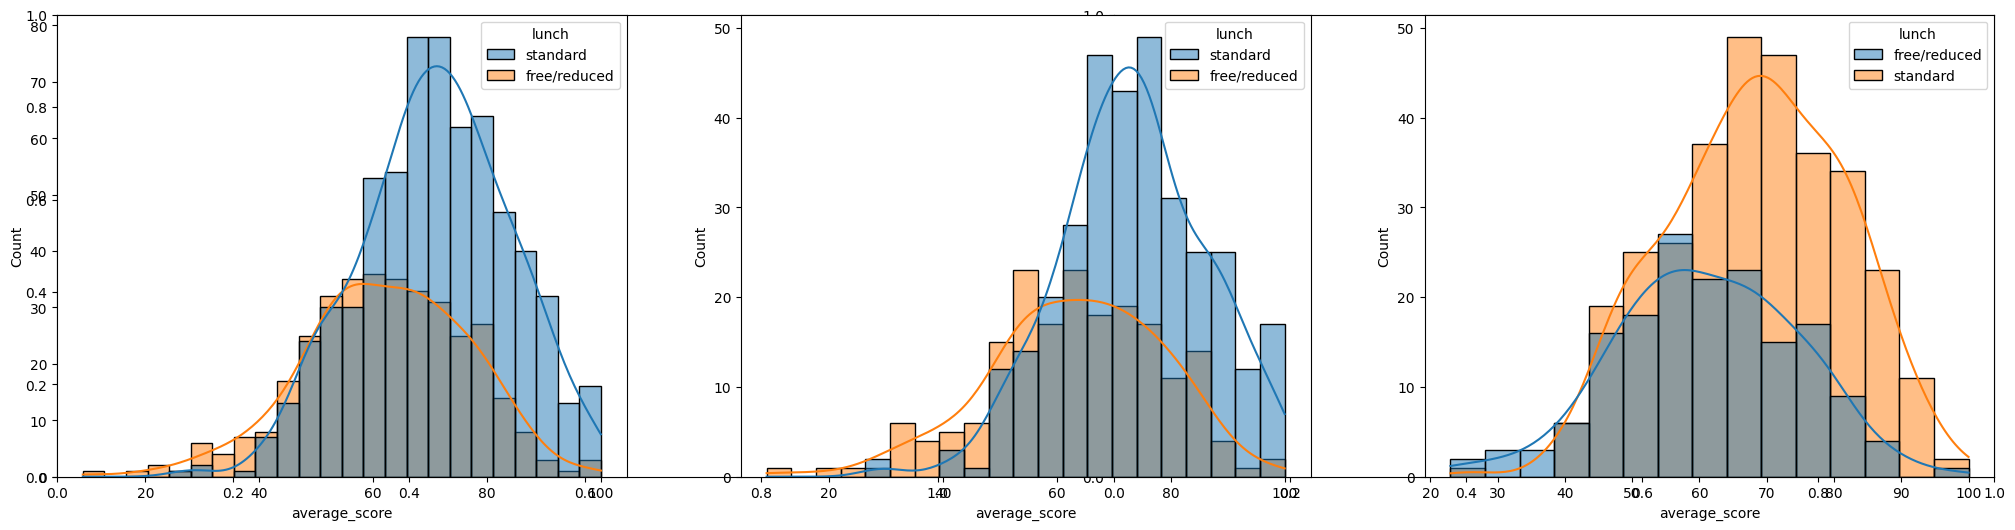

In [15]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=college,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=college[college.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=college[college.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insights

* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

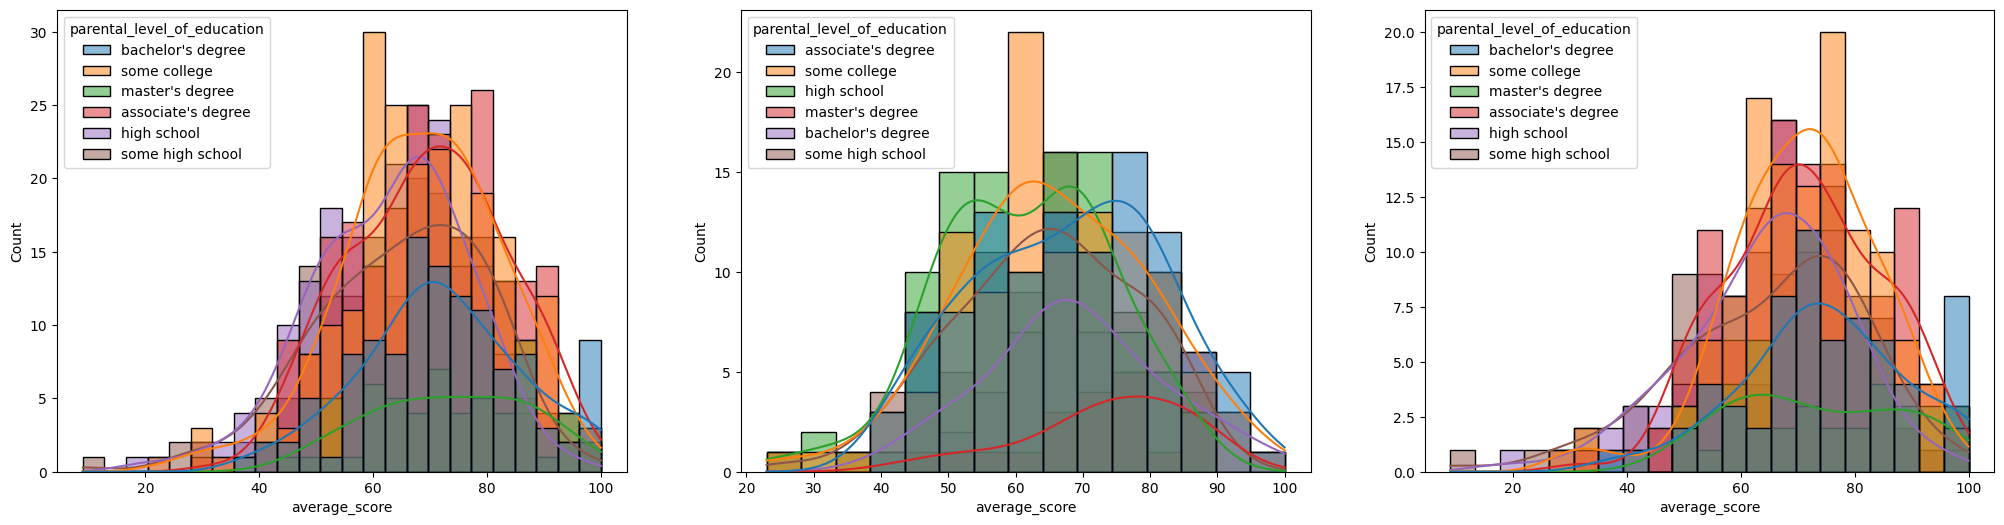

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=college,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=college[college.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=college[college.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

Insights

* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

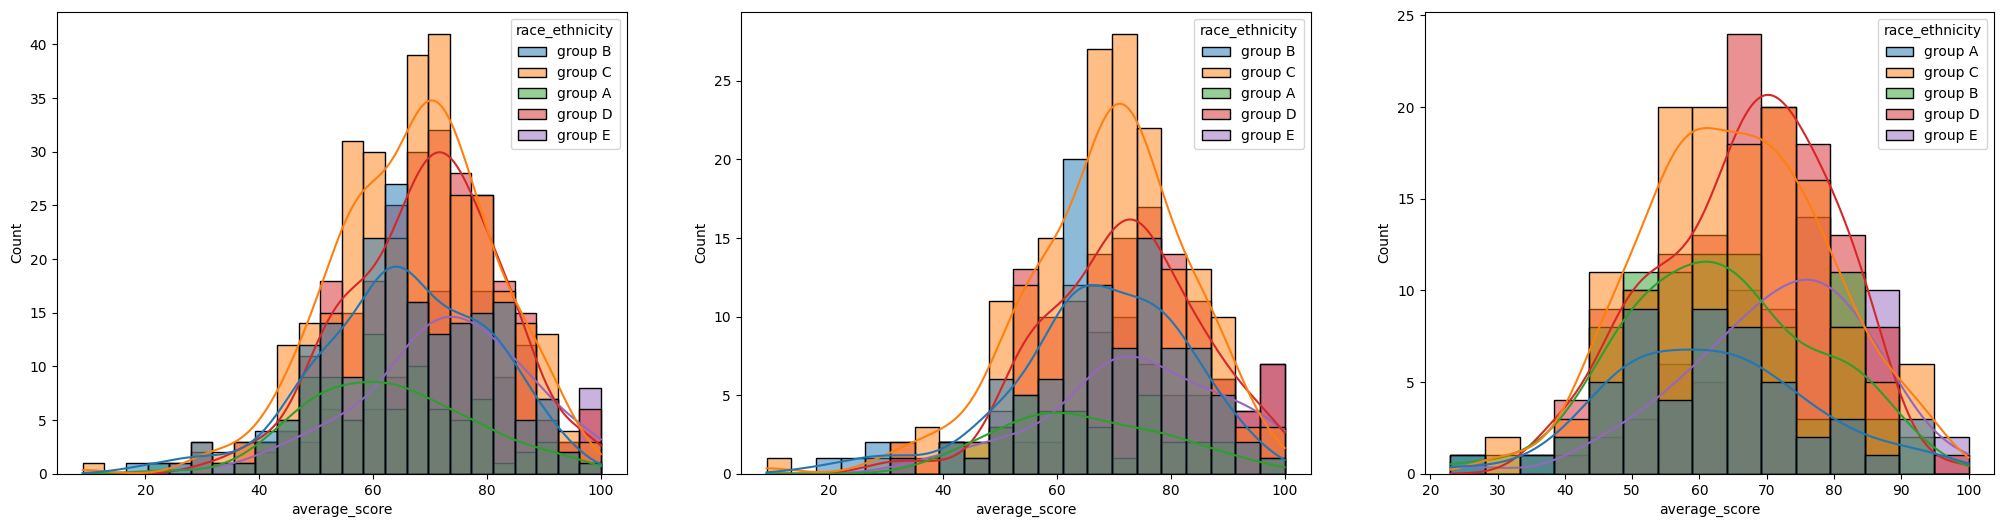

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=college,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=college[college.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=college[college.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

Insights

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [25]:
college.drop(columns = ['lunch'], axis = 1)

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,none,72,72,74,218,72.666667
1,female,group C,some college,completed,69,90,88,247,82.333333
2,female,group B,master's degree,none,90,95,93,278,92.666667
3,male,group A,associate's degree,none,47,57,44,148,49.333333
4,male,group C,some college,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282,94.000000
996,male,group C,high school,none,62,55,55,172,57.333333
997,female,group C,high school,completed,59,71,65,195,65.000000
998,female,group D,some college,completed,68,78,77,223,74.333333
